# The SIR-Model
$S(t)$: suszeptible individuals, $I(t)$ infected individuals, $R(t)$ resistant individuals, $D(t)$ deaths.
\begin{align}
\dot{S}(t)&=-\mu S(t)+\kappa N(t)-\beta S(t)\cdot\frac{I(t)}{N(t)}\\
\dot{I}(t)&=-(\mu +\lambda) I(t)+\beta S(t)\cdot\frac{I(t)}{N(t)}-\nu I(t)\\
\dot{R}(t)&=-\mu R(t)+\nu I(t)\\
\dot{D}(t)&=\mu N(t)+\lambda I(t)\\
N(t)&=S(t)+I(t)+R(t)
\end{align}

where $\mu$ is the mortality rate of the population without the disease, $\lambda$ is the letality due to the disease, $\kappa$ is the birth rate, $\beta$ is the rate at which a suszeptible gets infected, and $\nu$ is the rate at which an infected individual recovers.

Let us take a simple model to start with $\mu = 0, \kappa = 0$
\begin{align}
\dot{S}(t)&=-\beta S(t)\cdot\frac{I(t)}{N(t)} + \alpha \cdot R(t) \\
\dot{I}(t)&=\beta S(t)\cdot\frac{I(t)}{N(t)}-\nu I(t)\\
\dot{R}(t)&=-\alpha R(t)+\nu I(t)\\
N(t)&=S(t)+I(t)+R(t)
\end{align}

$$\alpha\beta\gamma\delta\epsilon\zeta\eta\iota\kappa\lambda\mu\nu\omicron\pi\rho\sigma\tau\upsilon\phi\chi\psi\omega$$

Wenn man die Impfrate auch hinzugefügt: $\mu = 0, \kappa = 0, \gamma :$ Impfrate
\begin{align}
\dot{S}(t)&=-\beta S(t)\cdot\frac{I(t)}{N(t)} + \alpha \cdot R(t) - \gamma \cdot S(t) \\
\dot{I}(t)&=\beta S(t)\cdot\frac{I(t)}{N(t)}-\nu I(t)\\
\dot{R}(t)&=-\alpha R(t)+\nu I(t) + \gamma \cdot S(t)\\
N(t)&=S(t)+I(t)+R(t)
\end{align}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
def f(t,r):
    mue = 0
    kap = 0.03
    bet = 0.5
    lam = 0
    nue = 0.01
    #
    S, I, R = r # r gibt den Wert für S, I und R, und die r-wert wird von solve_ivp random gegeben.
    N = S+I+R  # N: Gesamt anzahl von Menschen: Gesund + Infizierte + 
    #
    dSdt = -mue*S + kap*N - bet*S*I/N
    dIdt = -(mue+lam)*I+bet*S*I/N -nue*I
    dRdt = -mue*R + nue*I
    dDdt = mue * N + lam * I
    #
    return [dSdt, dIdt, dRdt]

In [ ]:
# neu modell: die recoverd Leute wird ständig wieder suszeptiert werden
def f(t,r):
    mue = 0
    kap = 0.0
    bet = 0.5
    lam = 0.0
    nue = 0.01
    alpha = 0.1
    #
    S, I, R = r # r gibt den Wert für S, I und R, und die r-wert wird von solve_ivp random gegeben.
    N = S+I+R  # N: Gesamt anzahl von Menschen: Gesund + Infizierte + 
    #
    dSdt = -mue*S + kap*N - bet*S*I/N + alpha * R
    dIdt = -(mue+lam)*I+bet*S*I/N -nue*I
    dRdt = -mue*R + nue*I - alpha * R
    dDdt = mue * N + lam * I
    #
    return [dSdt, dIdt, dRdt]

# The SIR-Model
$S(t)$: suszeptible individuals, $I(t)$ infected individuals, $R(t)$ resistant individuals, $D(t)$ deaths.
\begin{align}
\dot{S}(t)&=-\mu S(t)+\kappa N(t)-\beta S(t)\cdot\frac{I(t)}{N(t)}\\
\dot{I}(t)&=-(\mu +\lambda) I(t)+\beta S(t)\cdot\frac{I(t)}{N(t)}-\nu I(t)\\
\dot{R}(t)&=-\mu R(t)+\nu I(t)\\
\dot{D}(t)&=\mu N(t)+\lambda I(t)\\
N(t)&=S(t)+I(t)+R(t)
\end{align}
where $\mu$ is the mortality rate of the population without the disease, $\lambda$ is the letality due to the disease, $\kappa$ is the birth rate, $\beta$ is the rate at which a suszeptible gets infected, and $\nu$ is the rate at which an infected individual recovers.

Let us take a simple model to start with
\begin{align}
\dot{S}(t)&=-\mu S(t)+\kappa N(t)-\beta S(t)\cdot\frac{I(t)}{N(t)}\\
\dot{I}(t)&=-(\mu +\lambda) I(t)+\beta S(t)\cdot\frac{I(t)}{N(t)}-\nu I(t)\\
\dot{R}(t)&=-\mu R(t)+\nu I(t)\\
N(t)&=S(t)+I(t)+R(t)
\end{align}

$$\alpha\beta\gamma\delta\epsilon\zeta\eta\iota\kappa\lambda\mu\nu\omicron\pi\rho\sigma\tau\upsilon\phi\chi\psi\omega$$

In [ ]:
n = 1001
t_n = 10.
t_eval = np.linspace(0.,t_n,n)
r_0 = np.array([990.,10.,0.]) #r_0:Anfangsbedingung: [gesund, infizierte,gestrobene]
#r_0 = np.array([S_0,I_0,R_0])
#S_0 = S[-1]
#R_0 = R[-1]
#I_0 = I[-1]
t_span = np.array([0.,t_n])
sol = solve_ivp(f,t_span,r_0,t_eval=t_eval, method = 'RK45', rtol = 1.e-8, atol = 1.e-10)
S = sol.y[0]
I = sol.y[1]
R = sol.y[2]

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
#
ax.plot(S, label = "susceptibles")
ax.plot(I, label = "infected")
ax.plot(R, label = "recovered")
ax.legend()

### Wir führen einen Impfstoff ein. Dieser wirkt auf die Veränderung der Population der Suszeptiblen und der Population der Resistenten oder Genesenen. Wie ist das in dem Gleichungssystem, d.h. in f(t,r), abzubilden?

## Neu modell
die recoverd Leute wird ständig wieder suszeptiert werden, und eine gewissene Anteil von suszeptible werden geimpft.

Wenn man die Impfrate auch hinzugefügt: $\mu = 0, \kappa = 0, \gamma :$ Impfrate
\begin{align}
\dot{S}(t)&=-\beta S(t)\cdot\frac{I(t)}{N(t)} + \alpha \cdot R(t) - \gamma \cdot S(t) \\
\dot{I}(t)&=\beta S(t)\cdot\frac{I(t)}{N(t)}-\nu I(t)\\
\dot{R}(t)&=-\alpha R(t)+\nu I(t) + \gamma \cdot S(t)\\
N(t)&=S(t)+I(t)+R(t)
\end{align}

where $\mu$ is the mortality rate of the population without the disease, $\lambda$ is the letality due to the disease, $\kappa$ is the birth rate, $\beta$ is the rate at which a suszeptible gets infected, and $\nu$ is the rate at which an infected individual recovers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# neu modell: die recoverd Leute wird ständig wieder suszeptiert werden, und eine gewissene Anteil von suszeptible werden geimpft.
def f(t,r):
    mue = 0  # natürliche Sterberate
    kap = 0.0   #Geburtenrate
    bet = 0.25   # Ansteckungsrate
    lam = 0.3   # Streberate
    nue = 0.01  # Genesungsrate
    alpha = 0.15   # Resisdenzerlustrate (revocery -> suszeptible)
    gamma = 0.35  # Impfrate
    #
    S, I, R, D = r # r gibt den Wert für S, I und R, und die r-wert wird von solve_ivp random gegeben.
    N = S+I+R  # N: Gesamt anzahl von Menschen: Gesund + Infizierte + 
    #
    dSdt = -mue*S + kap*N - bet*S*I/N + alpha * R - gamma *S
    dIdt = -(mue+lam)*I+bet*S*I/N -nue*I
    dRdt = -mue*R + nue*I - alpha * R + gamma *S
    dDdt = mue * N + lam * I
    #
    return [dSdt, dIdt, dRdt,dDdt]

In [4]:
n = 1001
t_n = 100
t_eval = np.linspace(0.,t_n,n)
r_0 = np.array([990.,10.,0.,0.]) #r_0:Anfangsbedingung: [gesund, infizierte,gestrobene, gestrobene]
#r_0 = np.array([S_0,I_0,R_0])
#S_0 = S[-1]
#R_0 = R[-1]
#I_0 = I[-1]
t_span = np.array([0.,t_n])
sol = solve_ivp(f,t_span,r_0,t_eval=t_eval, method = 'RK45', rtol = 1.e-8, atol = 1.e-10)
S = sol.y[0]
I = sol.y[1]
R = sol.y[2]
D = sol.y[3]

<IPython.core.display.Javascript object>


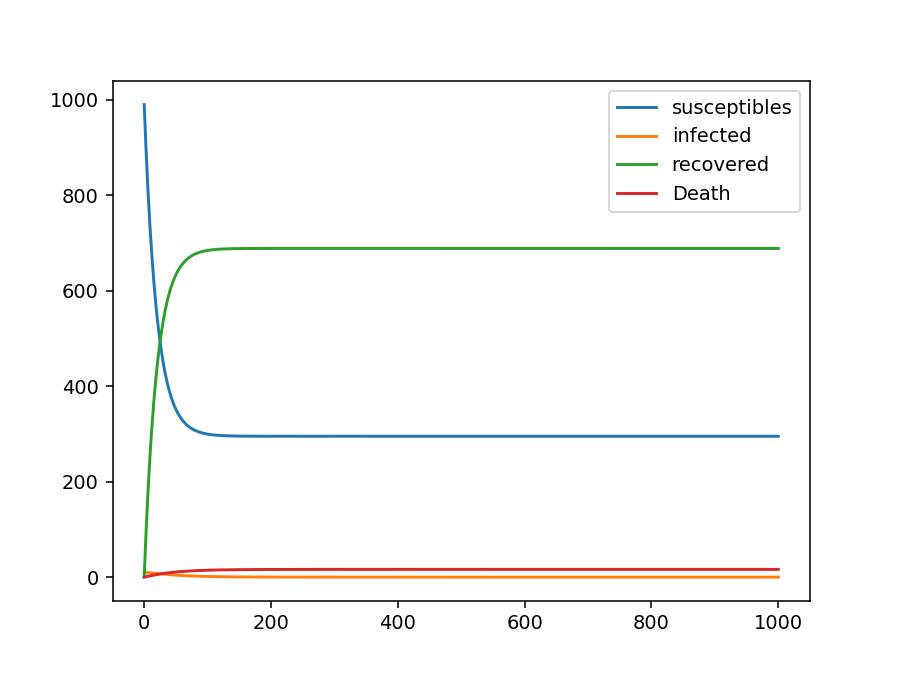

In [5]:
%matplotlib notebook
fig, ax = plt.subplots()
#
ax.plot(S, label = "susceptibles")
ax.plot(I, label = "infected")
ax.plot(R, label = "recovered")
ax.plot(D, label = "Death")
ax.legend()